In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

All the datasets we will be using in this notebook are from https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r. 
The datasets are preprocessed by a survey via Amazon Mechanical Turk, and have some reliability issues such as the lack of explanations about the columns, the surveyees, and whether the dataset is collected in an inclusive way.    

We first examine the smart device usage data to find trends in the behaviours of non-Bellabeat customers. We then apply these insights to answer the following questions: <br> 

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

In [11]:
steps_df = pd.read_csv('C:/Users/Lenovo/Desktop/Capstone/hourlySteps_merged.csv')
steps_df.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [12]:
steps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


Notice that ActivityHour columns is in string format. Let's convert it to a datetime format so that we can play with it more esily and capture trends over time.

In [13]:
steps_df.ActivityHour = pd.to_datetime(steps_df.ActivityHour)

Check the datatype of ActivityHour column again:

In [14]:
steps_df.ActivityHour.dtype 

dtype('<M8[ns]')

In [15]:
steps_df.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


How many different Id's does the dataset have?

In [16]:
steps_df.Id.nunique()

33

Reset the ActivityHour as the index.

In [18]:
steps_df.set_index('ActivityHour', inplace=True)
steps_df.sample(5)

,Id,StepTotal
ActivityHour,,
2016-04-15 16:00:00,1624580081,0
2016-05-04 23:00:00,1927972279,0
2016-04-17 11:00:00,2347167796,1489
2016-04-23 04:00:00,6775888955,0
2016-04-20 04:00:00,8378563200,227


What is the time range of the dataset, i.e. when did the surveyees' data get first and last recorded?

In [23]:
print(min(steps_df.index))
print(max(steps_df.index))

2016-04-12 00:00:00
2016-05-12 15:00:00


The time range of the dataset is almost a month. We should keep in mind that a month is not a long enough time to acquire exact insights about customers behaviours and trends regarding the product. We keep proceeding our analysis neverthless.

First get the total amount of steps taken each day by the first customer and then plot it.

In [391]:
customer = steps_df[steps_df.Id == steps_df.Id.unique()[0]]
total_steps = customer.groupby(customer.index.day)['StepTotal'].sum()

<AxesSubplot:xlabel='ActivityHour'>

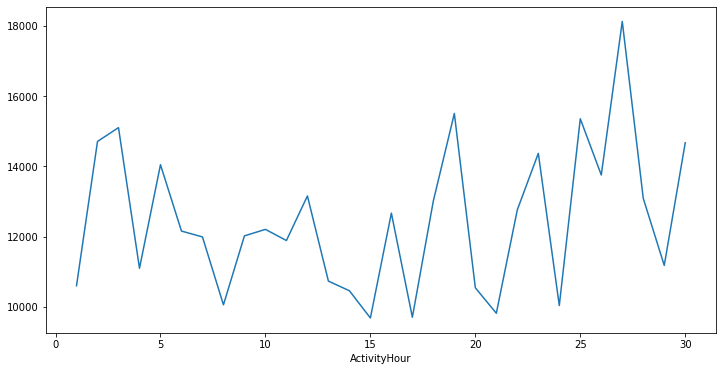

In [83]:
total_steps.plot(figsize=(12,6))

Based on only this customer, we can spot some trends:
- The customers steps almost always more than 10,000 steps per day. Considering that the CDC recommend that most adults aim for 10,000 steps per day, and the average American walks 3,000 to 4,000 steps per day, we can say that the customer is likely to have an active lifestyle and have an above average health than the average American people.
- We can place a consistent various peaks for each week. These could be the workout/jogging days for the customer, and we should take into consideration that the target of the datasets might be generally active people. 

### Hypothesis 1: The surveyees generally step more than 10,000 per day.
### Hypothesis 2: The surveyees generally step more than the average American do.

Note that based on whether the hypotheses are true or not, we can define a target customers for Bellabeat. In case the hypotheses are true, as Bellabeat, we might put some focus on the women who have overall less active lifestyles.

Now, plot the total amount of steps taken each day by the all customers, and test the above hypothesis. Additionaly, plot the scatter plot for the total amount of steps to easily get an insight about the average number of total steps. Note that, as a result we will have 33 rows of plots, but neverthless we will be able to spot the trend. 

<ipython-input-96-0d9e366ef9e4>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


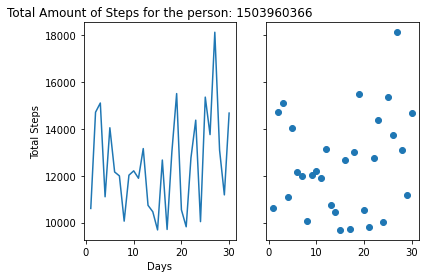

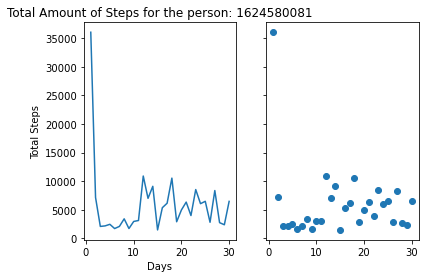

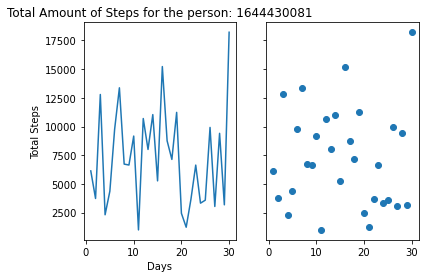

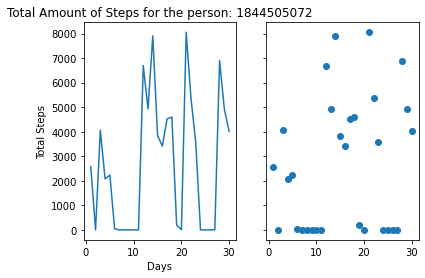

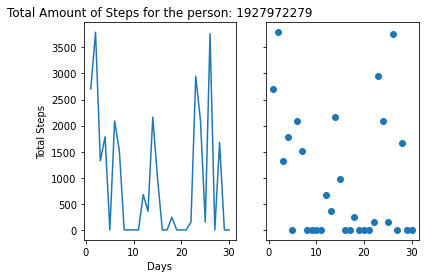

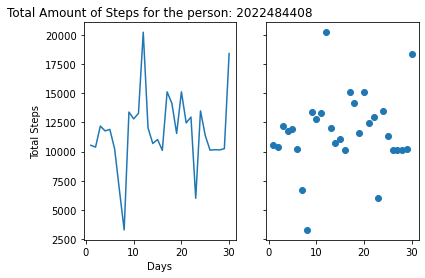

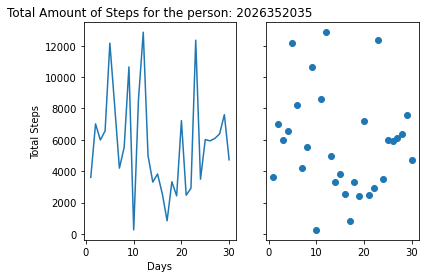

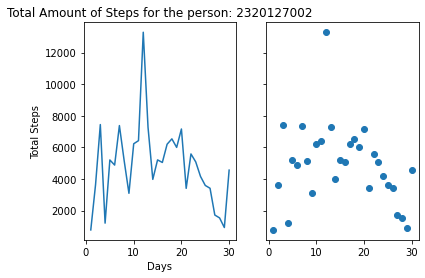

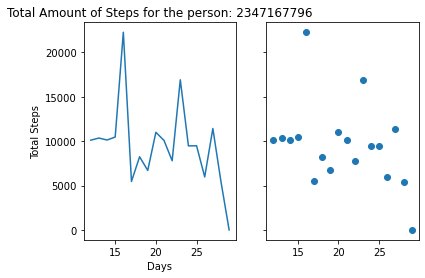

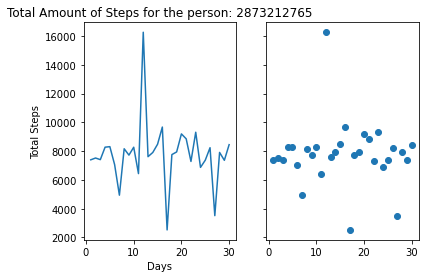

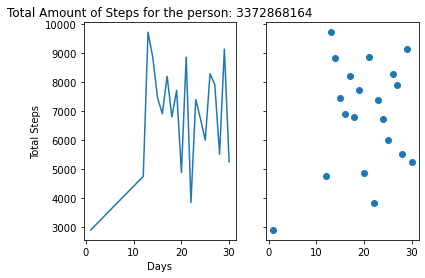

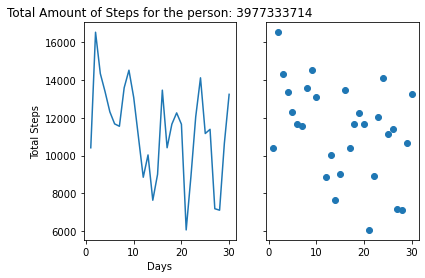

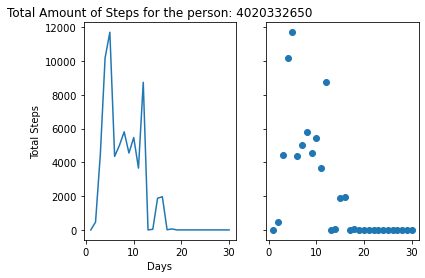

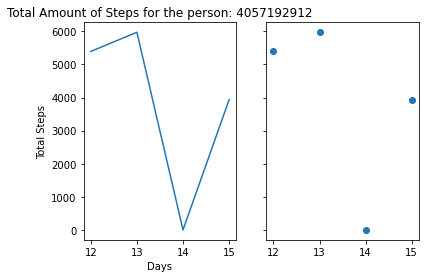

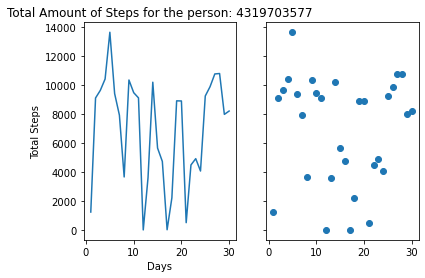

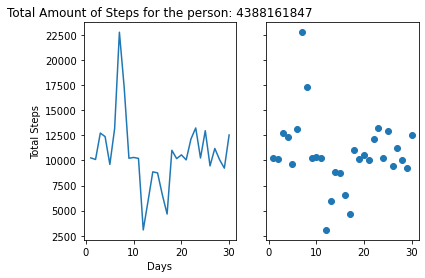

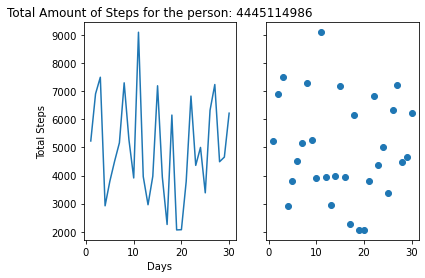

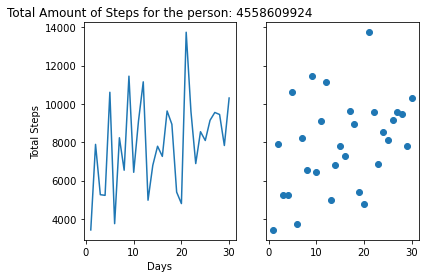

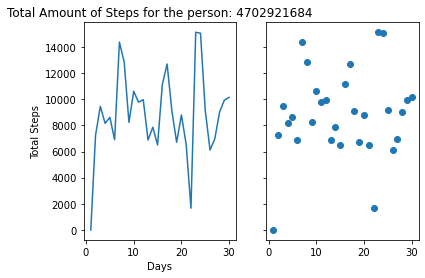

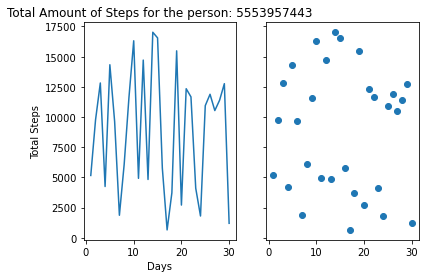

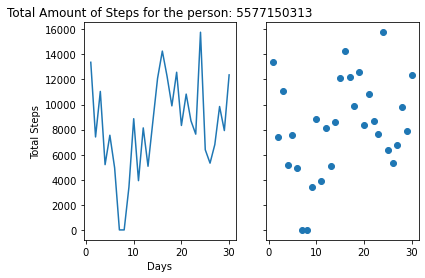

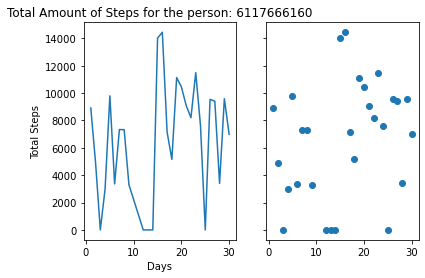

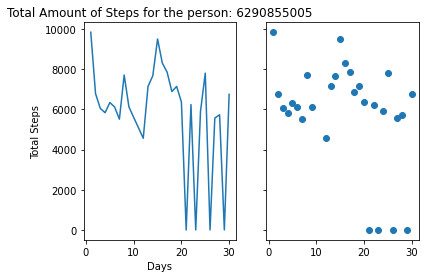

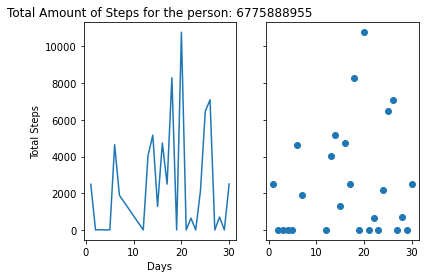

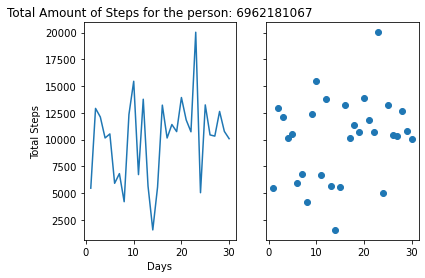

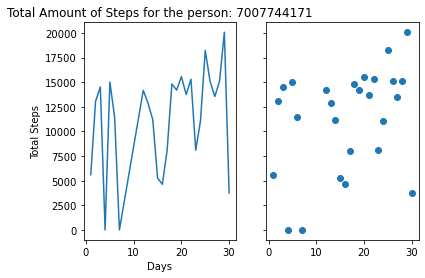

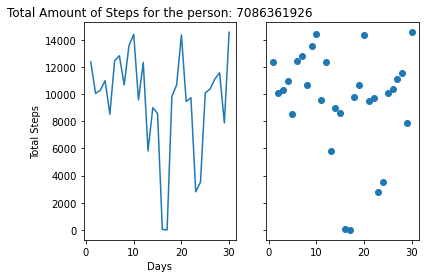

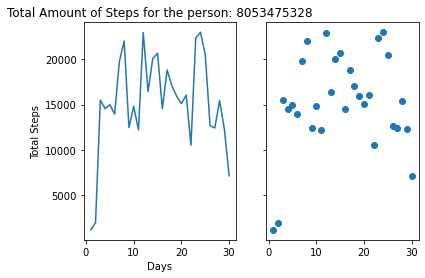

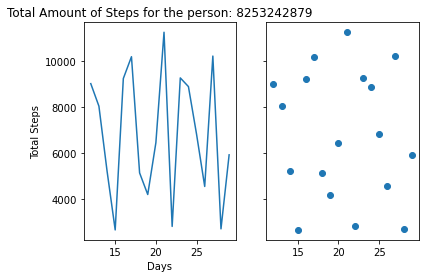

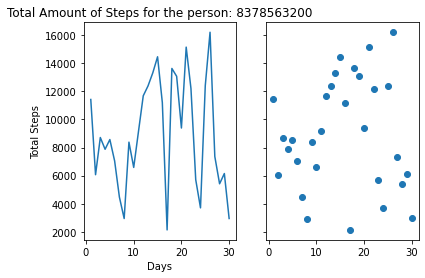

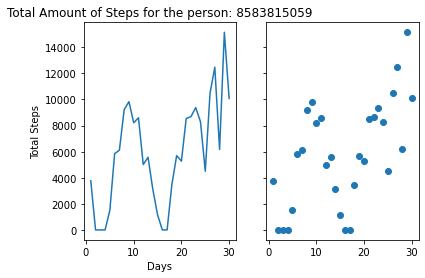

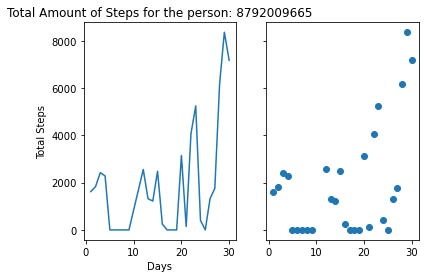

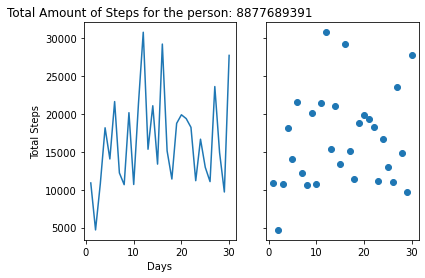

In [96]:
for id in steps_df.Id.unique():
    customer = steps_df[steps_df.Id == id]
    total_steps = customer.groupby(customer.index.day)['StepTotal'].sum()
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(total_steps.index, total_steps.values)
    ax1.set_title(f'Total Amount of Steps for the person: {id}')
    ax1.set_xlabel('Days')
    ax1.set_ylabel('Total Steps')
    ax2.scatter(total_steps.index, total_steps)

## Hypothesis 1 Result: FALSE

We have seen that the total number of steps vary largely from person to person, and the target for the dataset does not seem to have similar active lifestyles. 
Now calculate the daily average steps for each person and test the second hypothesis.

In [147]:
daily_avg_steps = pd.DataFrame({'Daily Average Step': []})
for id in steps_df.Id.unique():
    customer = steps_df[steps_df.Id == id]['StepTotal']
    values = customer.groupby(customer.index.day).sum().values
    average_steps = np.sum(values) / len(values)
    
    index = len(daily_avg_steps)
    daily_avg_steps.loc[index] = average_steps

<AxesSubplot:>

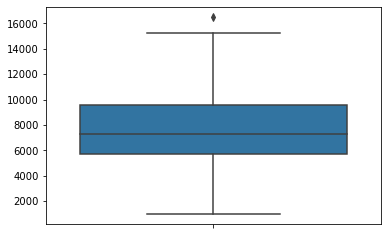

In [148]:
sns.boxplot(data=daily_avg_steps, y=daily_avg_steps.values)

## Hypothesis 2 Result: TRUE

More than 75% of the surveyees walk more than 4,000 steps a day on average.

## Calories Dataframe

In [170]:
calories_df = pd.read_csv('C:/Users/Lenovo/Desktop/Capstone/hourlyCalories_merged.csv', parse_dates=[1])
calories_df.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


### Data Consistency

In [168]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [167]:
calories_df.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


First thing we notice is that the minimum, average and maximum burnt calories are 42, 97 and 948, respectively. According to this article by health.hardvard.edu [1], people burn 38-52 calories in sleeping, 68-252 calories in some light home/daily-life activites, 750-1050 calories when running 7.5 mph (8 min/mile). So all of three variables seem consistent.

[1]: https://www.health.harvard.edu/diet-and-weight-loss/calories-burned-in-30-minutes-for-people-of-three-different-weights

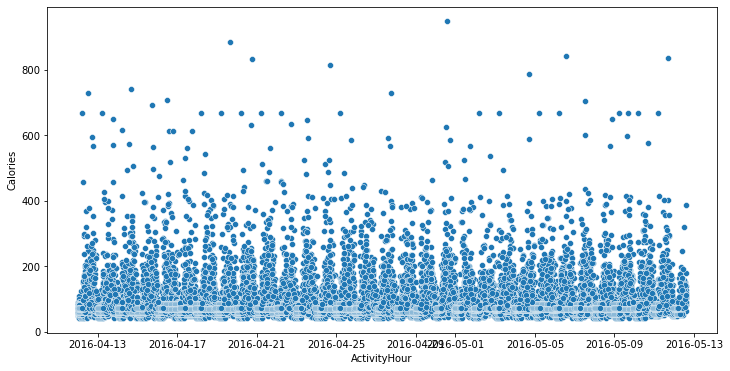

In [175]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=calories_df, x=calories_df.ActivityHour, y=calories_df.Calories);

We can see that most burnt calories per hour are under 400. This seems reasonable as vigorous activities such as high impact aerobics burn around 400-500 calories a hour.

Get the number of distinct IDs again:

In [165]:
calories_df.Id.nunique()

33

We again have 33 IDs as expected. <br>
Check for null values.

In [166]:
calories_df.isna().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

### Heart Rate

In [321]:
hearts_df = pd.read_csv('C:/Users/Lenovo/Desktop/Capstone/heartrate_seconds_merged.csv', parse_dates=[1])
hearts_df.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [339]:
hearts_df[(hearts_df.Time > '2016-04-12 13:00:00') & (hearts_df.Time < '2016-04-12 14:00:00')]

,Id,Time,Value
2301,2022484408,2016-04-12 13:00:15,66
2302,2022484408,2016-04-12 13:00:20,67
2303,2022484408,2016-04-12 13:00:35,66
2304,2022484408,2016-04-12 13:00:50,66
2305,2022484408,2016-04-12 13:01:00,67
...,...,...,...
2259048,8877689391,2016-04-12 13:59:08,67
2259049,8877689391,2016-04-12 13:59:23,68
2259050,8877689391,2016-04-12 13:59:33,67
2259051,8877689391,2016-04-12 13:59:38,65


Plot the daily heart rate average for the first customer between 2016-04-12 13:00:00 and 2016-04-12 14:00:00.

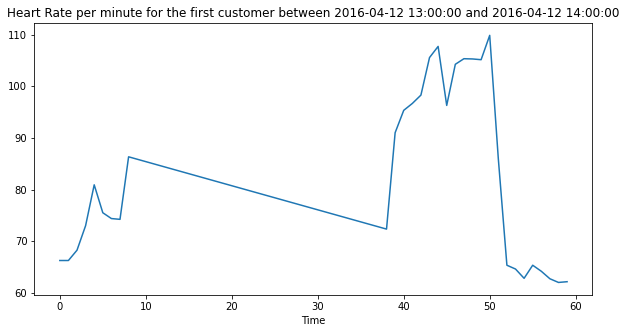

In [342]:
customer = hearts_df[(hearts_df.Id == 2022484408) & ((hearts_df.Time > '2016-04-12 13:00:00') & (hearts_df.Time < '2016-04-12 14:00:00'))].set_index('Time')
daily_hearts = customer.groupby(customer.index.minute).Value.mean()
daily_hearts.plot(title='Heart Rate per minute for the first customer between 2016-04-12 13:00:00 and 2016-04-12 14:00:00', figsize=(10,5));

We managed to get the average heart rate per minute for a specific time.

In [319]:
hearts_df.Id.unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391], dtype=int64)

Notice that the Ids in hearts rate dataframe are different than the ones in steps, calories and intensities dataframe. We unfortunately will not be able to compare hearts rate with other attributes.

In [297]:
hearts_df['Time'] = hearts_df.Time.dt.strftime('%Y-%m-%d %H:00:00')

Calculate the average heart rate per second for each customer, and plot the histogram to show how the average values are distributed.

In [305]:
avg_hearts = hearts_df.groupby('Id')[['Time', 'Value']].mean()

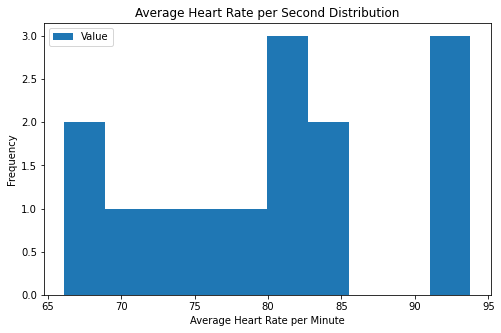

In [343]:
ax = avg_hearts.plot(kind='hist', title='Average Heart Rate per Second Distribution', figsize=(8,5))
ax.set_xlabel('Average Heart Rate per Minute');

### Combine Dataframes

In [386]:
intensities_df = pd.read_csv('C:/Users/Lenovo/Desktop/Capstone/hourlyIntensities_merged.csv', parse_dates=[1])
intensities_df.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


Let's combine calories, intensities and steps dataframes.

In [187]:
dfs = [calories_df, intensities_df, steps_df.reset_index()]

import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right), dfs)

In [188]:
df_final

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0
...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,12,0.200000,514
22095,8877689391,2016-05-12 11:00:00,192,29,0.483333,1407
22096,8877689391,2016-05-12 12:00:00,321,93,1.550000,3135
22097,8877689391,2016-05-12 13:00:00,101,6,0.100000,307


Plot the relation between each columns in the final dataframe

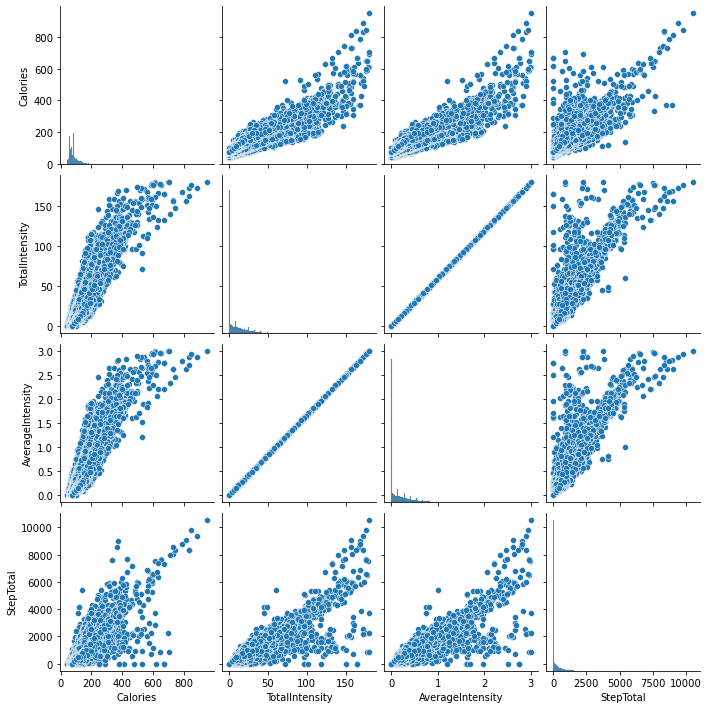

In [360]:
sns.jointplot(data=df_final.iloc[:, 1:], )

Get the average values of each attribute per hour in the final dataframe:

In [387]:
avg_cols = df_final.groupby('Id')[['Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal']].mean()
avg_cols

,Calories,TotalIntensity,AverageIntensity,StepTotal
Id,,,,
1503960366,78.503487,16.170153,0.269503,522.379358
1624580081,62.472826,8.039402,0.133990,241.508152
1644430081,118.820621,10.519774,0.175330,307.806497
1844505072,66.595075,5.021888,0.083698,109.359781
1927972279,91.504076,1.857337,0.030956,38.586957
2022484408,105.479620,17.031250,0.283854,477.869565
2026352035,64.911685,10.812500,0.180208,233.788043
2320127002,72.555102,8.742857,0.145714,198.687075
2347167796,88.717391,14.521739,0.242029,413.857488


We now have a good summary about each customers' data, and can give each customer distinct recommendations based on their lifestyles.

Find a relation between the average calories each person burn a ho"mur and AverageIntensity for each person.

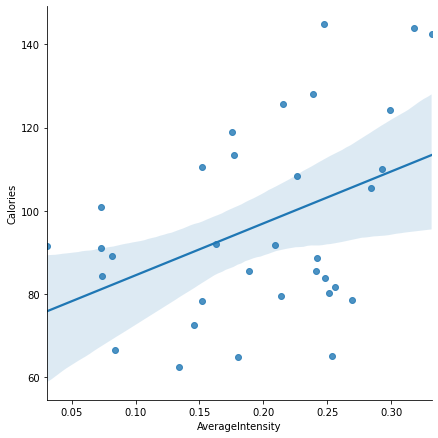

In [219]:
sns.lmplot(data=avg_cols, x='AverageIntensity', y='Calories', height=6);

This plot is particulary important because it gives us a great insight about the physical forms of the surveyees.

Notice that the plot starts a bit further than the leftmost point as the rolling average is calculated by taking the previous 7 days' average.

# Recommendations

- We have showed that the surveyees are likely to have a more active lifestyles than an average American. Bellabeat might additionally target the American women who tend to have less vigorous lifestyles.
- Bellabeat might give a forecasting service to its consumers for how much calories they will burn after certain activites, and design personal plans for each customers.
- Bellabeat can save the minutely heart rates we created to track their customer's heart-related behaviours, and give them notifications if the heart rate gets near to abnormal values.